In [64]:
import os
import pandas as pd

df_valid_raw = {}
df_test_raw = {}
MODEL_KEY = 'esm-33-gearnet-resiboost-n25'
FOLD_COUNT = 2
for fold in range(FOLD_COUNT):
    df_valid_raw[fold] = [pd.read_csv(f'./result_cv/{MODEL_KEY}/fold_{fold}/intermediate/' + file) for file in files if 'valid' in file]
    df_test_raw[fold] = [pd.read_csv(f'./result_cv/{MODEL_KEY}/fold_{fold}/intermediate/' + file) for file in files if 'test' in file]

In [65]:
def gen_prefix(n):
    df = pd.DataFrame()
    for fold in range(FOLD_COUNT):
        df_valid = aggregate_pred_dataframe(dfs=df_valid_raw[fold][:n], apply_sig=True).copy()
        df_test = aggregate_pred_dataframe(dfs=df_test_raw[fold][:n], apply_sig=True).copy()
        me_result = generate_mean_ensemble_metrics_auto(df_valid=df_valid, df_test=df_test)
        df = pd.concat([df, pd.DataFrame.from_dict([{'fold': fold, **me_result}])], axis=0)
    return df.reset_index(drop=True)

prefix_stats = [gen_prefix(n) for n in range(10, 101, 10)]

/home/jaechanlee/atpbind/lib/utils.py:95: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df[f'pred_{i}'] = dfs[i]['pred']
/home/jaechanlee/atpbind/lib/utils.py:95: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df[f'pred_{i}'] = dfs[i]['pred']
/home/jaechanlee/atpbind/lib/utils.py:95: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmente

<Axes: >

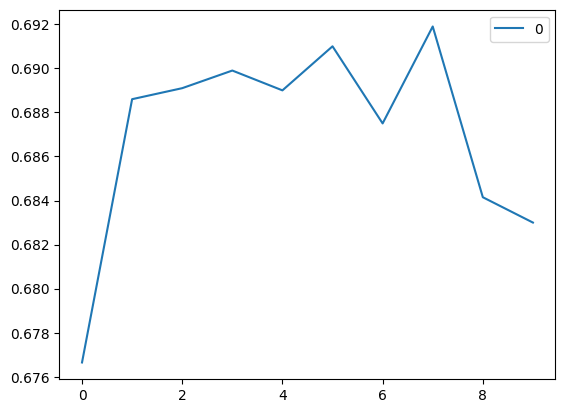

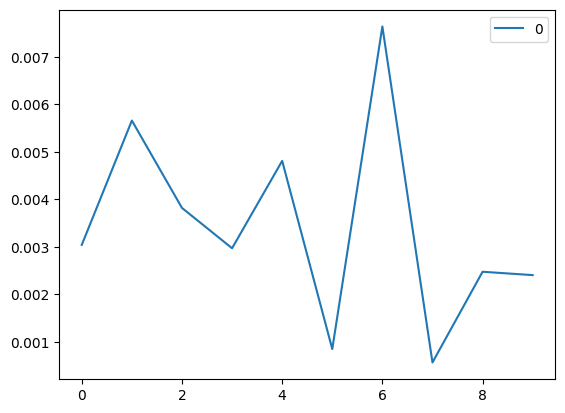

In [66]:
%matplotlib inline

pd.DataFrame([df.aggregate('mean')['mcc'] for df in prefix_stats]).plot()

pd.DataFrame([df.aggregate('std')['mcc'] for df in prefix_stats]).plot()


In [67]:
df = prefix_stats[0]

In [71]:
df.rename(columns={'mcc': 'mcc_20'})

,fold,sensitivity,specificity,accuracy,precision,mcc_20,micro_auroc
0,0,0.6380,0.9882,0.9700,0.7463,0.6745,0.9010
1,1,0.6411,0.9884,0.9704,0.7514,0.6788,0.9151


In [72]:
df

,fold,sensitivity,specificity,accuracy,precision,mcc,micro_auroc
0,0,0.6380,0.9882,0.9700,0.7463,0.6745,0.9010
1,1,0.6411,0.9884,0.9704,0.7514,0.6788,0.9151
